In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [63]:
# Reading Data
path = '..\listings.csv'
df = pd.read_csv(path)

# Descovering Data
df.head()
print(set(df.columns))

{'number_of_reviews', 'bathrooms', 'review_scores_value', 'id', 'notes', 'smart_location', 'amenities', 'instant_bookable', 'host_location', 'experiences_offered', 'extra_people', 'host_is_superhost', 'host_listings_count', 'calendar_last_scraped', 'name', 'calendar_updated', 'neighbourhood_group_cleansed', 'host_acceptance_rate', 'latitude', 'scrape_id', 'city', 'jurisdiction_names', 'guests_included', 'license', 'host_response_rate', 'host_verifications', 'availability_365', 'require_guest_profile_picture', 'transit', 'review_scores_communication', 'review_scores_checkin', 'review_scores_cleanliness', 'minimum_nights', 'host_about', 'review_scores_accuracy', 'price', 'weekly_price', 'calculated_host_listings_count', 'thumbnail_url', 'property_type', 'bed_type', 'last_review', 'monthly_price', 'first_review', 'availability_90', 'host_since', 'last_scraped', 'xl_picture_url', 'square_feet', 'cancellation_policy', 'require_guest_phone_verification', 'reviews_per_month', 'longitude', 'av

Question 1:
How do various property attributes affect the listing price?

In [64]:
# Selecting all the columns that is related to the question
columns_of_interest = ['price', 'accommodates', 'amenities', 'bathrooms', 'bedrooms', 'beds',
                       'property_type', 'room_type', 'square_feet', 'minimum_nights', 'maximum_nights',
                       'cleaning_fee', 'extra_people', 'security_deposit', 'neighbourhood',
                       'neighbourhood_cleansed', 'zipcode']

df_subset = df[columns_of_interest]
df_subset

,price,accommodates,amenities,bathrooms,bedrooms,beds,property_type,room_type,square_feet,minimum_nights,maximum_nights,cleaning_fee,extra_people,security_deposit,neighbourhood,neighbourhood_cleansed,zipcode
0,$250.00,4,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",1.5,2.0,3.0,House,Entire home/apt,NaN,2,1125,$35.00,$0.00,NaN,Roslindale,Roslindale,02131
1,$65.00,2,"{TV,Internet,""Wireless Internet"",""Air Conditio...",1.0,1.0,1.0,Apartment,Private room,NaN,2,15,$10.00,$0.00,$95.00,Roslindale,Roslindale,02131
2,$65.00,2,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",1.0,1.0,1.0,Apartment,Private room,NaN,3,45,NaN,$20.00,NaN,Roslindale,Roslindale,02131
3,$75.00,4,"{TV,Internet,""Wireless Internet"",""Air Conditio...",1.0,1.0,2.0,House,Private room,NaN,1,1125,$50.00,$25.00,$100.00,NaN,Roslindale,NaN
4,$79.00,2,"{Internet,""Wireless Internet"",""Air Conditionin...",1.5,1.0,2.0,House,Private room,NaN,2,31,$15.00,$0.00,NaN,Roslindale,Roslindale,02131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,$69.00,3,"{Internet,""Wireless Internet"",""Air Conditionin...",1.0,1.0,1.0,Apartment,Private room,NaN,2,1125,NaN,$24.00,$95.00,Somerville,Charlestown,02143
3581,$150.00,2,"{TV,Internet,""Wireless Internet"",""Air Conditio...",1.0,1.0,1.0,Apartment,Private room,NaN,3,365,$15.00,$0.00,$100.00,NaN,Allston,02446
3582,$198.00,4,"{""translation missing: en.hosting_amenity_49"",...",1.0,1.0,1.0,Apartment,Entire home/apt,NaN,3,12,NaN,$0.00,NaN,NaN,Charlestown,02141
3583,$65.00,2,"{Kitchen,Gym,""Family/Kid Friendly"",Washer,Drye...",1.0,1.0,1.0,Apartment,Private room,NaN,1,13,NaN,$30.00,$100.00,Somerville,Charlestown,02145


In [65]:
# looking for columns to delete
df_subset.columns[np.sum(df_subset.isnull(),axis=0)/df_subset.shape[0] > .75]

Index(['square_feet'], dtype='object')

In [66]:
# We found most of the square_feet column are null values so I removed it
df_subset = df_subset.drop(columns='square_feet')

In [67]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   3585 non-null   object 
 1   accommodates            3585 non-null   int64  
 2   amenities               3585 non-null   object 
 3   bathrooms               3571 non-null   float64
 4   bedrooms                3575 non-null   float64
 5   beds                    3576 non-null   float64
 6   property_type           3582 non-null   object 
 7   room_type               3585 non-null   object 
 8   minimum_nights          3585 non-null   int64  
 9   maximum_nights          3585 non-null   int64  
 10  cleaning_fee            2478 non-null   object 
 11  extra_people            3585 non-null   object 
 12  security_deposit        1342 non-null   object 
 13  neighbourhood           3042 non-null   object 
 14  neighbourhood_cleansed  3585 non-null   

In [68]:
np.sum(df_subset.isnull(), axis=0)

price                        0
accommodates                 0
amenities                    0
bathrooms                   14
bedrooms                    10
beds                         9
property_type                3
room_type                    0
minimum_nights               0
maximum_nights               0
cleaning_fee              1107
extra_people                 0
security_deposit          2243
neighbourhood              543
neighbourhood_cleansed       0
zipcode                     38
dtype: int64

In [69]:
# converting the columns that has a price from objects into floats se we can deal with them
df_subset['price'] = df_subset['price'].replace('[\\$,]', '', regex=True).astype(float)
df_subset['cleaning_fee'] = df_subset['cleaning_fee'].replace('[\\$,]', '', regex=True).astype(float)
df_subset['extra_people'] = df_subset['extra_people'].replace('[\\$,]', '', regex=True).astype(float)
df_subset['security_deposit'] = df_subset['security_deposit'].replace('[\\$,]', '', regex=True).astype(float)

df_subset

,price,accommodates,amenities,bathrooms,bedrooms,beds,property_type,room_type,minimum_nights,maximum_nights,cleaning_fee,extra_people,security_deposit,neighbourhood,neighbourhood_cleansed,zipcode
0,250.0,4,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",1.5,2.0,3.0,House,Entire home/apt,2,1125,35.0,0.0,NaN,Roslindale,Roslindale,02131
1,65.0,2,"{TV,Internet,""Wireless Internet"",""Air Conditio...",1.0,1.0,1.0,Apartment,Private room,2,15,10.0,0.0,95.0,Roslindale,Roslindale,02131
2,65.0,2,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",1.0,1.0,1.0,Apartment,Private room,3,45,NaN,20.0,NaN,Roslindale,Roslindale,02131
3,75.0,4,"{TV,Internet,""Wireless Internet"",""Air Conditio...",1.0,1.0,2.0,House,Private room,1,1125,50.0,25.0,100.0,NaN,Roslindale,NaN
4,79.0,2,"{Internet,""Wireless Internet"",""Air Conditionin...",1.5,1.0,2.0,House,Private room,2,31,15.0,0.0,NaN,Roslindale,Roslindale,02131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,69.0,3,"{Internet,""Wireless Internet"",""Air Conditionin...",1.0,1.0,1.0,Apartment,Private room,2,1125,NaN,24.0,95.0,Somerville,Charlestown,02143
3581,150.0,2,"{TV,Internet,""Wireless Internet"",""Air Conditio...",1.0,1.0,1.0,Apartment,Private room,3,365,15.0,0.0,100.0,NaN,Allston,02446
3582,198.0,4,"{""translation missing: en.hosting_amenity_49"",...",1.0,1.0,1.0,Apartment,Entire home/apt,3,12,NaN,0.0,NaN,NaN,Charlestown,02141
3583,65.0,2,"{Kitchen,Gym,""Family/Kid Friendly"",Washer,Drye...",1.0,1.0,1.0,Apartment,Private room,1,13,NaN,30.0,100.0,Somerville,Charlestown,02145


In [70]:
# Cheking for zeros in security_deposit and cleaning_fee
print((df_subset['security_deposit'] == 0).sum())
print((df_subset['cleaning_fee'] == 0).sum())

# As long as they does not zero values and have a lot of null value, I will assume that null is equal to 0
df_subset['security_deposit'] = df_subset['security_deposit'].fillna(0)
df_subset['cleaning_fee'] = df_subset['cleaning_fee'].fillna(0)

0
0


In [71]:
# We have two of this column, so I will use only one
df_subset = df_subset.drop(columns='neighbourhood')

In [72]:
# Drop the rest of null rows
df_subset = df_subset.dropna()

In [73]:
# Function to convert amenities sting to list
def parse_amenities(amenities_str):
    try:
        amenities_str = amenities_str.replace('translation missing: en.hosting_amenity_49', '')
        amenities_str = amenities_str.replace('translation missing: en.hosting_amenity_50', '')
        amenities_list = amenities_str.strip('{}').replace('"', '').split(',')
        amenities_list = [amenity.strip() for amenity in amenities_list]
        return amenities_list
    except ValueError:
        return []

# Apply the function to convert amenities column
df_subset['amenities'] = df_subset['amenities'].apply(parse_amenities)

# Count occurrences of each amenity
amenities_counter = Counter()
df_subset['amenities'].apply(amenities_counter.update)

# Create columns for each amenity
for amenity in amenities_counter:
    df_subset[amenity] = df_subset['amenities'].apply(lambda x: 1 if amenity in x else 0)

# Finally, drop the amenities column
df_subset = df_subset.drop(columns='amenities')

In [74]:
# Drop the room_type because it was afficting my model accuracy
df_subset = df_subset.drop(columns='room_type')

# Convert the categorical to columns and then to 0 and 1
df_subset = pd.get_dummies(df_subset, columns=['property_type', 'neighbourhood_cleansed', 'zipcode'])
for column in df_subset.columns:
    if df_subset[column].dtype == 'bool':
        df_subset[column] = df_subset[column].astype(int)

df_subset

,price,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,cleaning_fee,extra_people,security_deposit,...,zipcode_02163,zipcode_02169,zipcode_02186,zipcode_02210,zipcode_02215,zipcode_02218,zipcode_02445,zipcode_02446,zipcode_02467,zipcode_02472
0,250.0,4,1.5,2.0,3.0,2,1125,35.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,65.0,2,1.0,1.0,1.0,2,15,10.0,0.0,95.0,...,0,0,0,0,0,0,0,0,0,0
2,65.0,2,1.0,1.0,1.0,3,45,0.0,20.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,79.0,2,1.5,1.0,2.0,2,31,15.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5,75.0,2,1.0,1.0,1.0,2,1125,30.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,69.0,3,1.0,1.0,1.0,2,1125,0.0,24.0,95.0,...,0,0,0,0,0,0,0,0,0,0
3581,150.0,2,1.0,1.0,1.0,3,365,15.0,0.0,100.0,...,0,0,0,0,0,0,0,1,0,0
3582,198.0,4,1.0,1.0,1.0,3,12,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3583,65.0,2,1.0,1.0,1.0,1,13,0.0,30.0,100.0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
X = df_subset.drop(columns=['price'])  # Independent variables
y = df_subset['price']  # Dependent variable

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [76]:
# I tried different regression models and the Random Forest was the most accurate model

# Initalize the model
model = RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=300, random_state=42) # Note: I used the GridSearchCV to find the best parameters for this Random Forest model.

# fitting the model
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, max_features='sqrt', n_estimators=300,
                      random_state=42)

In [77]:
# Generate predictions and compare them
y_pred  = model.predict(X_test)
results = pd.DataFrame(data={'Predictions': y_pred, 'Actuals': y_test})
results = results.sort_index()
results

,Predictions,Actuals
0,174.636667,250.0
8,108.144749,58.0
15,95.262090,60.0
18,70.707500,49.0
26,78.379838,90.0
...,...,...
3542,141.357143,140.0
3558,230.797667,195.0
3571,86.507659,89.0
3573,65.859398,65.0


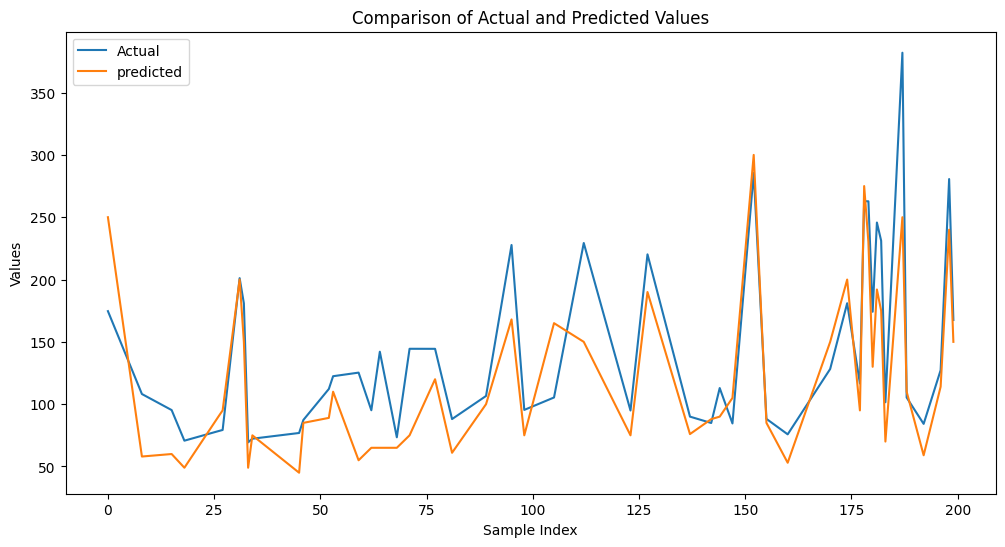

In [78]:
# Plot the Comparison of Actual and Predicted Values
plt.figure(figsize=(12,6))
plt.plot(results[:50])
plt.legend(['Actual' , 'predicted'])
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Values')
plt.show()

In [79]:
# Evaluate the model on training and testing data
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"Training R^2 score: {train_score:.2f}")
print(f"Testing R^2 score: {test_score:.2f}")

Training R^2 score: 0.90
Testing R^2 score: 0.62


In [80]:
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Root Mean Squared Error (RMSE)
rmse = mse ** 0.5
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Mean Absolute Percentage Error (MAPE)
mape = (abs((y_test - y_pred) / y_test).mean()) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Squared Error (MSE): 4484.38
Root Mean Squared Error (RMSE): 66.97
Mean Absolute Error (MAE): 43.04
Mean Absolute Percentage Error (MAPE): 33.59%


In [81]:
importances = model.feature_importances_

# Create a DataFrame to better visualize the feature importances
feature_importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances*100})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

feature_importances_df

,Feature,Importance
0,accommodates,7.074107
1,cleaning_fee,6.334506
2,bedrooms,5.742650
3,minimum_nights,5.256429
4,beds,4.658200
...,...,...
129,zipcode_02186,0.000100
130,property_type_Camper/RV,0.000000
131,zipcode_02134-1704,0.000000
132,zipcode_02142,0.000000


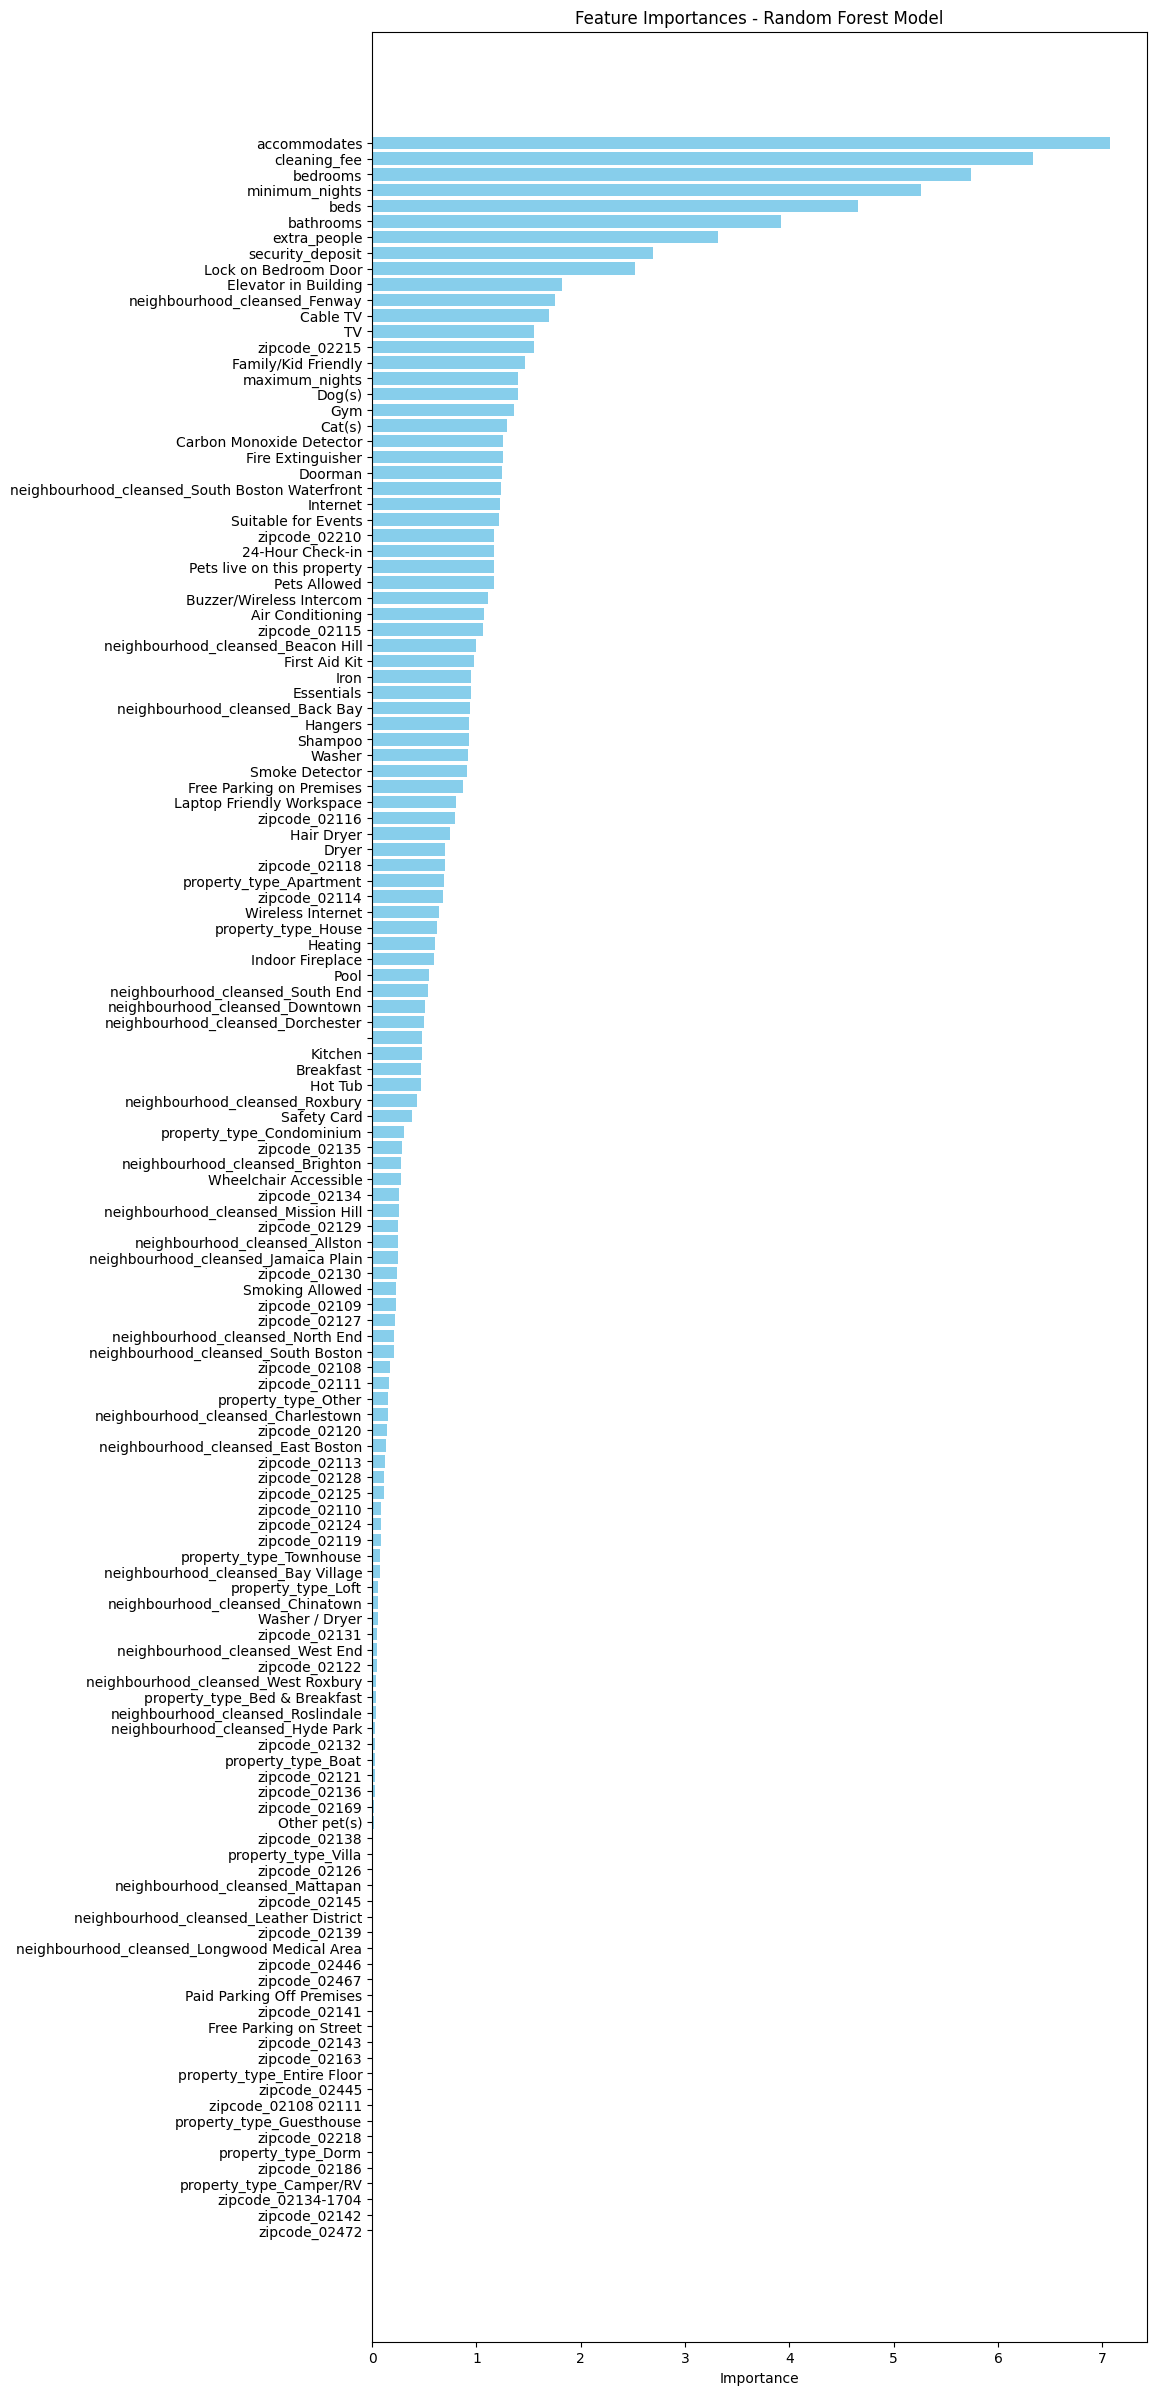

In [82]:
# Plot the the feature importances

plt.figure(figsize=(10, 30))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances - Random Forest Model')
plt.gca().invert_yaxis()
plt.show()